#### Project 1: Loan Prediction with Classification Model (Simple Machine Learning Algorithm))

##### Goal:
The goal of the loan prediction is to classify loan clients on the basis of who is likely to pay the loan and who is not. This is a binary classification that involves analyzing various factors associated with the application and predicting their loan approval status.

#### Step 1: Import necessary libraries

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Step 2: Load the dataset

In [97]:
loan_data = pd.read_csv('loan_prediction_datasett.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Step 3: Data Cleaning

In [100]:
# Impute missing values with the median for numerical columns
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(), inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].median(), inplace=True)

In [109]:
# Impute missing values with the mode for categorical columns
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Dependents'] = loan_data['Dependents'].replace('3+', 3)
loan_data['Dependents'] = loan_data['Dependents'].fillna(0).astype(int)

In [111]:
# Verify no missing values remain
print("Missing values after cleaning:", loan_data.isnull().sum().sum())

Missing values after cleaning: 0


#### Step 4: Exploratory Data Analysis (EDA)

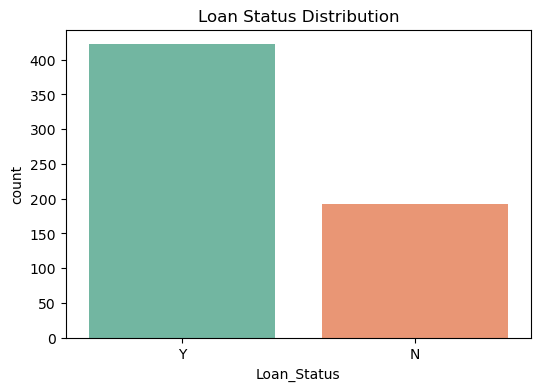

In [114]:
# Plot the distribution of Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=loan_data, palette='Set2')
plt.title('Loan Status Distribution')
plt.show()

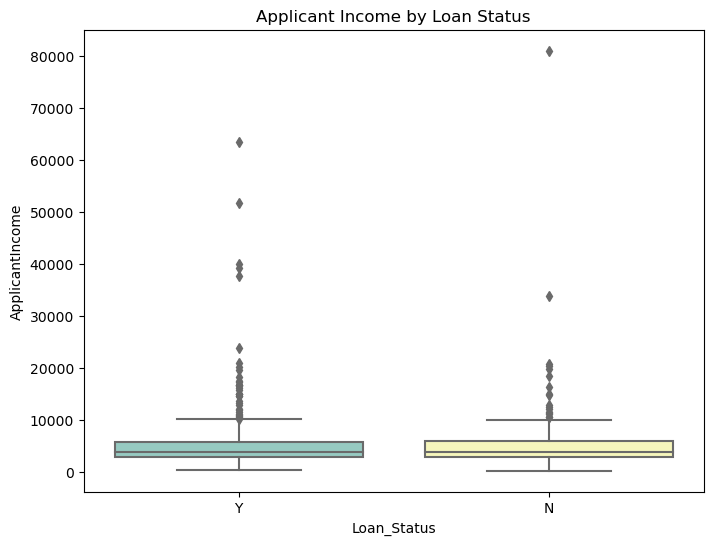

In [117]:
# Boxplot of Applicant Income by Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_data, palette='Set3')
plt.title('Applicant Income by Loan Status')
plt.show()

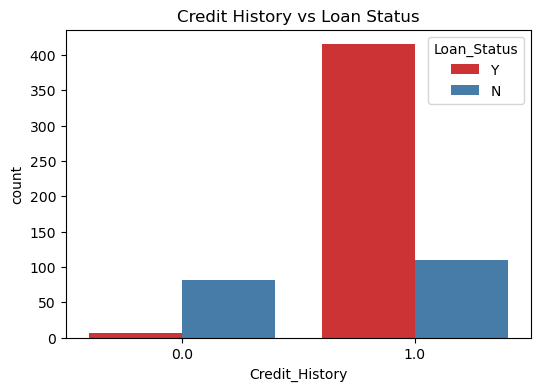

In [119]:
# Plot the relationship between Credit History and Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_data, palette='Set1')
plt.title('Credit History vs Loan Status')
plt.show()

#### Step 5: Data Preparation for Modeling

In [122]:
# Encode categorical variables
le = LabelEncoder()
loan_data['Gender'] = le.fit_transform(loan_data['Gender'])
loan_data['Married'] = le.fit_transform(loan_data['Married'])
loan_data['Education'] = le.fit_transform(loan_data['Education'])
loan_data['Self_Employed'] = le.fit_transform(loan_data['Self_Employed'])
loan_data['Property_Area'] = le.fit_transform(loan_data['Property_Area'])
loan_data['Loan_Status'] = le.fit_transform(loan_data['Loan_Status'])

In [124]:
# Define features (X) and target (y)
X = loan_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = loan_data['Loan_Status']

In [126]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [128]:
# Step 6: Model Building
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [130]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#### Step 7: Model Evaluation

In [133]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7783783783783784
Confusion Matrix:
 [[ 32  33]
 [  8 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.49      0.61        65
           1       0.77      0.93      0.85       120

    accuracy                           0.78       185
   macro avg       0.79      0.71      0.73       185
weighted avg       0.78      0.78      0.76       185



#### Step 8: Visualization of Model Results

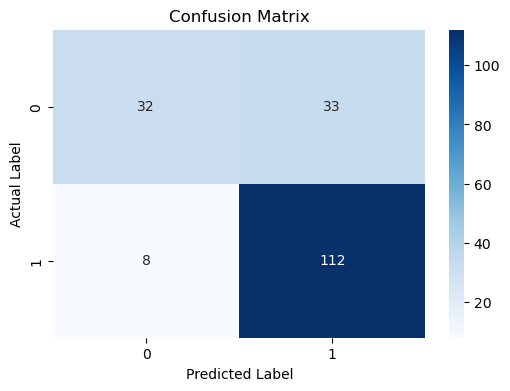

In [136]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Interpretation of the Results:
#### Accuracy:
The model's accuracy is approximately 77.8%. This means that out of all the predictions made by the model, about 77.8% were correct.
#### Confusion Matrix:
##### True Positives (TP): 112
The model correctly predicted 112 instances where the loan would be approved (class 1).
##### True Negatives (TN): 32
The model correctly predicted 32 instances where the loan would not be approved (class 0).
##### False Positives (FP): 33
The model incorrectly predicted 33 instances as loan approvals (class 1) when they were actually not approved (class 0).
##### False Negatives (FN): 8
The model incorrectly predicted 8 instances as loan disapprovals (class 0) when they were actually approved (class 1).
#### Classification Report:
##### Precision:
For class 0 (loan not approved): The precision is 0.80, meaning that 80% of the predictions the model made for non-approved loans were correct.
For class 1 (loan approved): The precision is 0.77, meaning that 77% of the predictions the model made for approved loans were correct.
##### Recall:
For class 0: The recall is 0.49, indicating that the model correctly identified 49% of the actual non-approved loans.
For class 1: The recall is 0.93, indicating that the model correctly identified 93% of the actual approved loans.
##### F1-Score:
The F1-score for class 0 is 0.61, which is a balance between precision and recall. This lower score suggests that the model is struggling more with predicting non-approved loans.
The F1-score for class 1 is 0.85, indicating strong performance in predicting approved loans.
#### Overall Evaluation:
The model performs reasonably well, particularly in predicting loan approvals (class 1) with high recall and a decent F1-score.